credit : tau-data.id

Kelompok:
* Pajar Purnama Sidik - Kaizen
* Regina Aperita Lusiana Harahap - Khasanah Ilmi
* Steven Christ Pinantyo Arwidarasto - Alfatih
* Miranda Tambunan - Alpha Go
* Azzahra Agitha Karina - Devalopa

### Import Modul Standar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


# Data Sunspots

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT_yMX5e805Tx8ZtrUwfPHhjLFj5Zbp9V8tGL_dlMUSqDfjZJqnoPKIjqJtabiE-9ywAhlxo6fq5S7b/pub?gid=1502686797&single=true&output=csv")
df.head(10)

,date,ts
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
5,1749-06-30,139.2
6,1749-07-31,158.0
7,1749-08-31,110.5
8,1749-09-30,126.5
9,1749-10-31,125.8


Melihat informasi singkat dari dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3265 non-null   object 
 1   ts      3265 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


Dari informasi singkat di atas, kita dapat mengetahui bahwa df terdiri dari 3265 baris.
Selain itu, pada kolom Datetime, tipe datanya masih berupa object (string) sehingga perlu diubah menjadi tipe data datetime dengan cara berikut.

In [4]:
# merubah tipe data object to datetime
df['date'] = df['date'].astype('datetime64')

# melihat tipe data dataframe
print(df.dtypes)


date    datetime64[ns]
ts             float64
dtype: object


Perhatikan waktu terawal dari kolom Datetime dan 5 data teratas dari df


In [5]:
print('waktu terawal dari kolom Datetime adalah:', df['date'].min())
df.head()


waktu terawal dari kolom Datetime adalah: 1749-01-31 00:00:00


,date,ts
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


Dapat kita lihat bahwa waktu pada baris pertama dari kolom tidak sama dengan waktu terawalnya.
Maka dari itu perlu kita urutkan df berdasarkan Datetime menggunakan df.sort_values().


In [6]:
# mengurutkan data berdasarkan waktu
df.sort_values('date', inplace=True, ignore_index=True)
df.head()

,date,ts
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


Plot Data df

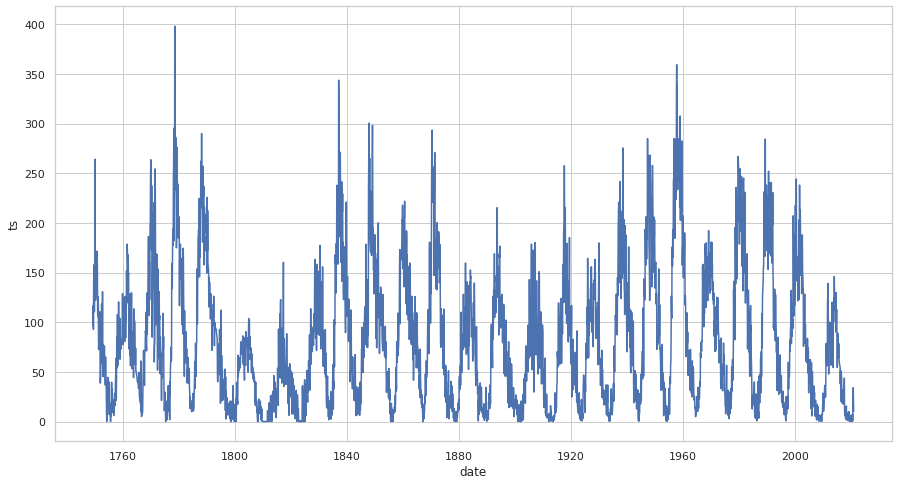

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='date', y='ts')


Memilih Data 100 tahun Terakhir
Pada contoh ini kita hanya akan gunakan data setahun terakhir dari data Monthly Mean Total Sunspot Number
Karena data yang diobservasi per jam, maka kita akan mengambil -12*100=1200 baris terakhir dari df dan dimasukan kedalam variabel df1


In [8]:
df.tail()

,date,ts
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8
3264,2021-01-31,10.4


In [9]:
df1 = df[-12*100:].reset_index(drop=True)
df1.head()


,date,ts
0,1921-02-28,47.1
1,1921-03-31,44.5
2,1921-04-30,54.0
3,1921-05-31,37.0
4,1921-06-30,56.2


Plot Data df1


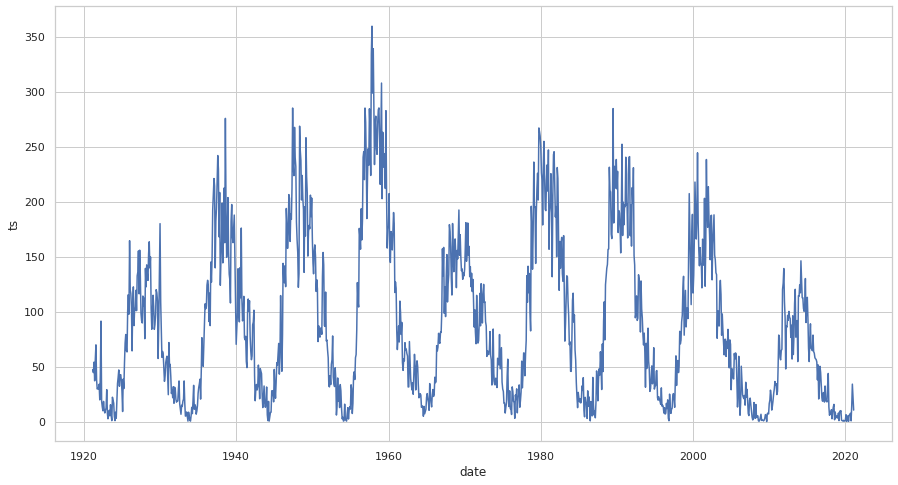

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df1, x='date', y='ts')


Berdasarkan plot diatas, maka monthly mean total sunspot number memiliki penurunan bila dibandingkan antara tahun 1920 dan 2020

In [11]:
df1.describe()

,ts
count,1200.000000
mean,90.046583
std,73.564166
min,0.000000
25%,26.875000
50%,72.700000
75%,140.050000
max,359.400000


Dari statistika deskriptif di atas terlihat bahwa data Monthly Mean Total Sunspot Number memiliki nilai min sebesar 0 dan nilai maks sebesar 359, maka diperlukan feature scalling menggunakan MinMaxScaler agar range dari seluruh data tersebut berada di antara 0 dan 1

List normalisasi yang tersedia oleh sklearn : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html




### Split Data


Split data dilakukan agar model yang telah dilatih dapat dievaluasi kemampuannya.
Karena data yang digunakan adalah data time series, maka split data tidak dilakukan secara acak
Kita juga akan melakukan cross validation menggunakan data train sehingga pastikan data train yang digunakan cukup besar.
Pada contoh ini kita gunakan 70% baris pertama sebagai data train dan 30% sisanya sebagai data test.

In [12]:
# split data
train_size = int(len(df1) * 0.7) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df1[:train_size]
test =df1[train_size:].reset_index(drop=True)

Feature Scalling Menggunakan MinMaxScaler
MinMaxScaler difit pada data train agar dapat digunakan kembali pada data test maupun data observasi baru.
Hasil scalling disimpan pada kolom baru yaitu 'scaled'


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['ts']])

train['scaled'] = scaler.transform(train[['ts']])
test['scaled'] = scaler.transform(test[['ts']])

Mari kita lihat 5 data pertama pada data train untuk melihat data yang sudah discalling

In [14]:
train.head()


,date,ts,scaled
0,1921-02-28,47.1,0.130084
1,1921-03-31,44.5,0.122841
2,1921-04-30,54.0,0.149304
3,1921-05-31,37.0,0.101950
4,1921-06-30,56.2,0.155432


Membuat fungsi sliding window
Selanjutnya kita akan membuat fungsi sliding window dengan input data (bertipe data numpy array) dan window size
Fungsi ini akan menghasilkan variabel input (X) dan variabel target (y)

In [15]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y


Berapa window size yang tepat untuk digunakan?
Pada penerapannya kita dapat menentukan window size berapa saja.
Untuk mencapai hasil yang maksimal dapat dilakukan percobaan dengan menggunakan beberapa window size.
Perlu diperhatikan juga bahwa semakin** besar window size **yang digunakan akan memerlukan waktu yang cukup lama dalam proses training data
Pada contoh ini kita hanya menggunakan window size = 12 atau sama dengan 1 tahun dan kita terapkan pada data train dan test yang telah discalling

In [16]:
window_size = 12

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)


Penting!!!
Data input LSTM harus 3D : [samples, timesteps, feature]
Maka dari itu kita perlu cek dimensi data kita menggunakan np.shape

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(828, 12, 1) (828, 1)
(348, 12, 1) (348, 1)


## LSTM menggunakan Tensorflow dan Keras
tensorflow: https://www.tensorflow.org/overview
keras: https://keras.io/about/

Untuk membuat LSTM() layer menggunakan Keras, perhatikan parameter-parameter berikut untuk membuat LSTM layer sederhana, ada beberapa parameter yaitu 


*   units: menentukan banyaknya LSTM unit
*   input_shape: menentukan ukuran timesteps dan feature, diperlukan pada layer pertama
*   return_sequences: jika layer berikutnya berupa LSTM layer maka return_sequences=True (default = False)


Paramaeter-parameter lainnya dapat dilihat pada link berikut: https://keras.io/api/layers/recurrent_layers/lstm/



# Membuat Model Forecasting Menggunakan LSTM

Untuk menggunakan arsitektur GRU, ganti model LSTM dengan RNN atau GRU

# 1. Import Modul

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #, RNN, GRU 

# 2. Membuat Fungsi Model Forecasting Menggunakan LSTM
Fungsi model yang akan dibuat terdiri:

LSTM layer dengan 
* input_shape = (window_size, 1)
* Dense layer dengan 32 neuron dengan fungsi aktivasi ReLu
* Dropout antara Dense layer dan Dense output layer
* Dense output layer dengan 1 neuron
* loss function yang digunakan adalah Mean Squared Error (MSE)
* optimizer yang digunakan adalah adam
* metric yang digunakan adalah Mean Absolute Error (MAE)

* Parameter-parameter yang dijadikan sebagai input dari fungsi tersebut adalah:
  - LSTM_unit: banyaknya LSTM unit (default = 64)
  - dropout: persentase dropout (default = 0.2)

In [19]:
def create_model(LSTM_unit=64, dropout=0.2): #jika ingin menggunakan RNN atau GRU ganti LSTM dengan GRU/RNN
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

#3. Membuat Model
Kita coba lakukan hypertuning pada parameter, dengan mencoba kombinasi nilai LSTM unitnya 16,32,64,28 dan peluang dropout 0,1 dan 0,2



In [20]:
LSTM_unit = [16,32,64,128]
dropout = [0.1,0.2]


Selain itu, kita juga gunakan early stopping pada saat proses training



In [21]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

# 4. Membuat Variabel GridSearchCV
Variabel GridSearchCV dibuat dengan memasukan beberapa parameter yaitu:
- estimator: model yang ingin dilakukan gridsearch
- param_grid: parameter yang ingin diuji
- n_jobs: Jumlah pekerjaan untuk dijalankan secara paralel. (-1 artinya menggunakan seluruh core processor)
- cv: banyaknya k-fold cross validation

In [22]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

# 5. Training Model dengan GridSearchCV



In [23]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
24/24 [==============================] - 4s 41ms/step - loss: 0.0476 - mae: 0.1567 - val_loss: 0.0134 - val_mae: 0.0900
Epoch 2/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0155 - mae: 0.0927 - val_loss: 0.0088 - val_mae: 0.0703
Epoch 3/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0142 - mae: 0.0863 - val_loss: 0.0085 - val_mae: 0.0681
Epoch 4/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0132 - mae: 0.0834 - val_loss: 0.0090 - val_mae: 0.0691
Epoch 5/50
24/24 [==============================] - 0s 8ms/step - loss: 0.0116 - mae: 0.0776 - val_loss: 0.0076 - val_mae: 0.0635
Epoch 6/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0115 - mae: 0.0789 - val_loss: 0.0082 - val_mae: 0.0653
Epoch 7/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0111 - mae: 0.0777 - val_loss: 0.0067 - val_mae: 0.0596
Epoch 8/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0108 - mae: 0.

# 6. Melihat Hasil Parameter Terbaik


In [24]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model = grid_result.best_estimator_.model

Best: -0.005883 using {'LSTM_unit': 128, 'dropout': 0.2}
-0.005931 (0.002348) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.006312 (0.002709) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.005897 (0.002454) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.006129 (0.002699) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.005998 (0.002537) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.006121 (0.002901) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.006984 (0.003642) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.005883 (0.002492) with: {'LSTM_unit': 128, 'dropout': 0.2}


Dari Hasil Training menggunakan GridSearchCV, kita peroleh:

parameter terbaiknya adalah: {'LSTM_unit': 128, 'dropout': 0.2}
Kemudian coba kita lihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model terbaik kita dengan cara sebagai berikut

Kita dapat melihat grafik loss function MSE dan metric MAE terhadap epoch untuk melihat performa model kita dengan cara sebagai berikut


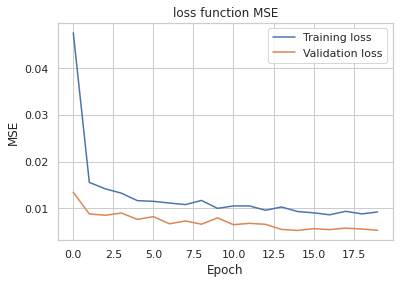

In [25]:
history = best_model.history
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

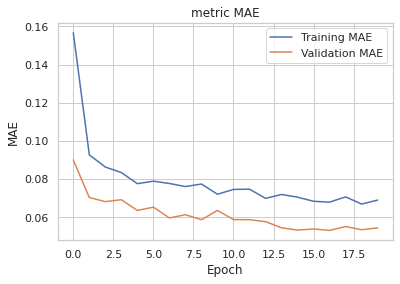

In [26]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

# 7. Evaluasi Model
Melakukan prediksi pada data train dan data test

In [27]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

Plot prediksi data train


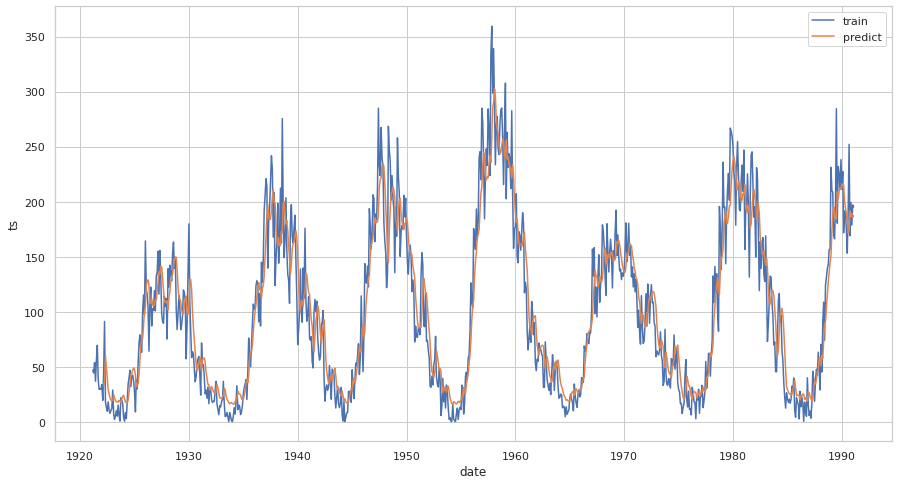

In [28]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=train, x='date', y='ts', label = 'train')
sns.lineplot(data=train, x='date', y='predict', label = 'predict')

Plot prediksi data test

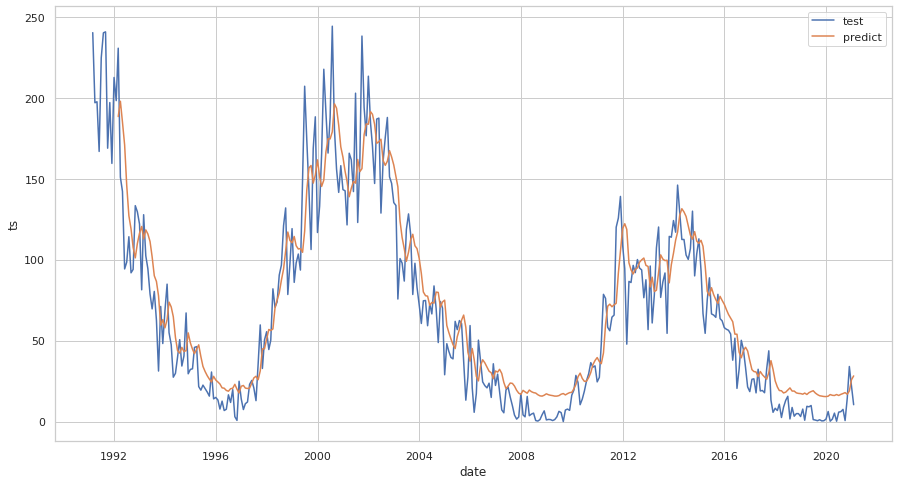

In [29]:
test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(15,8))
sns.lineplot(data=test, x='date', y='ts', label = 'test')
sns.lineplot(data=test, x='date', y='predict', label = 'predict')

Plot prediksi data test 10 tahun terakhir

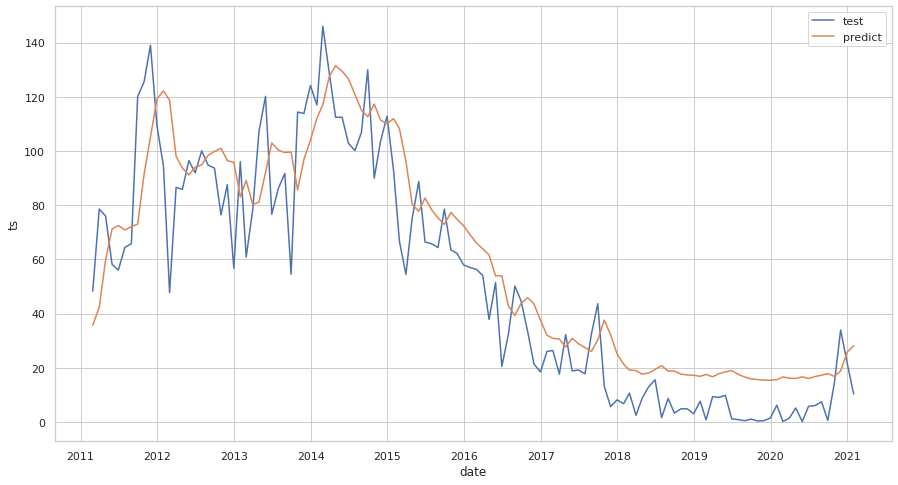

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-12*10:], x='date', y='ts', label = 'test')
sns.lineplot(data=test[-12*10:], x='date', y='predict', label = 'predict')

Melakukan forecasting

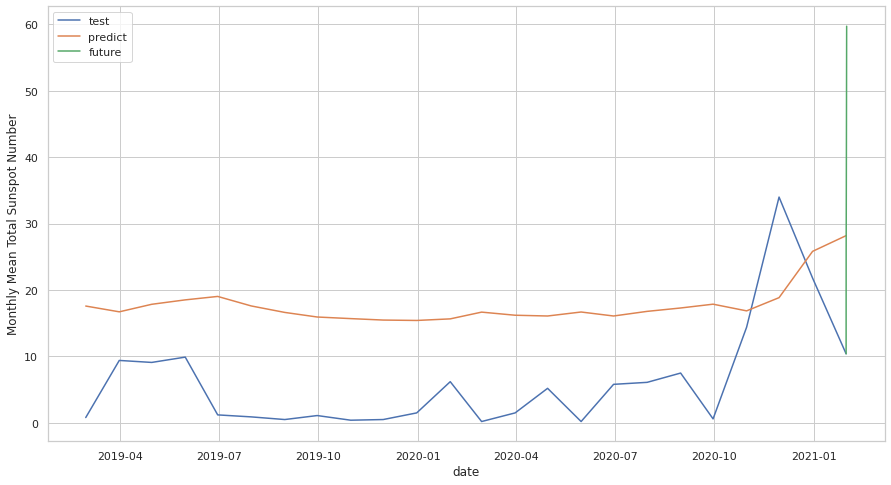

In [32]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['ts']])
n_future = 12*1
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test['date'].values[-1], periods=n_future+1, freq='H')
# Plot Data 2 tahun terakhir dan 1 tahun selanjutnya
plt.figure(figsize=(15,8))
sns.lineplot(data=test[-12*2:], x='date', y='ts', label = 'test')
sns.lineplot(data=test[-12*2:], x='date', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('Monthly Mean Total Sunspot Number');
